# Dike Model Analysis

In [6]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
import matplotlib.pyplot as plt

## Visual Analysis

In [13]:
experiments, outcomes = load_results('./data/preliminary_results_pr1.tar.gz')

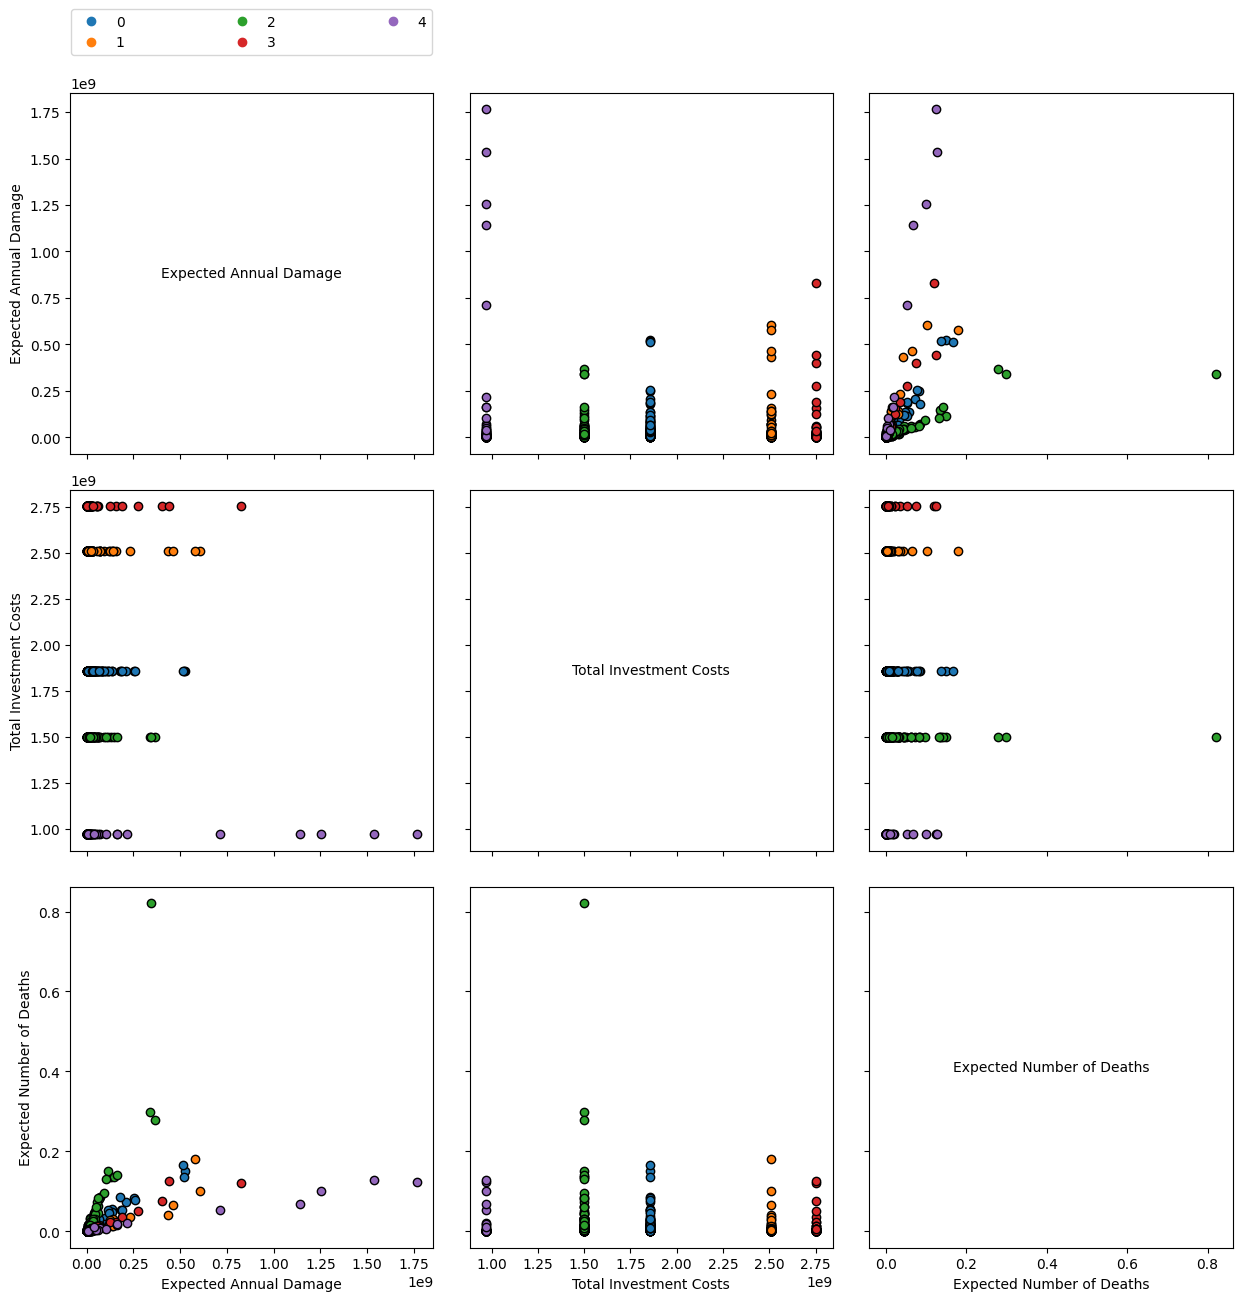

In [23]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

KeyError: 'Expected Annual Damage'

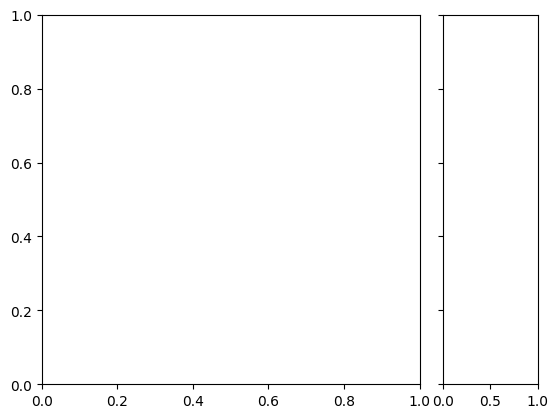

In [20]:
for outcome in outcomes.keys():
    plotting.lines(experiments, outcomes, outcomes_to_show=outcome,
                   density=plotting_util.Density.HIST)
plt.show()